In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
uploaded2 = files.upload()

Saving QuickML_data_utf8a.csv to QuickML_data_utf8a.csv


Saving 1072_boy_or_girl.csv to 1072_boy_or_girl.csv


In [0]:
import io

df = pd.read_csv(io.BytesIO(uploaded['QuickML_data_utf8a.csv']))  #導入數據集（叫做df）
df2= pd.read_csv(io.BytesIO(uploaded2['1072_boy_or_girl.csv']))
# Dataset is now stored in a Pandas Dataframe

# **導入Decision Tree**

In [0]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image, display
import pydotplus

def jupyter_graphviz(m, **kwargs):
    dot_data = StringIO()
    export_graphviz(m, dot_data, **kwargs) #導出決策樹的設定
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())#圖形設定
    display(Image(graph.create_png())) #顯示圖形

# **transform跟調整**



In [5]:
df['phone_os'] = df['phone_os'].str.lower()
# removing leading and trailing whitespaces
df['phone_os'] = df['phone_os'].str.strip()
df=df.drop(columns=['id', 'timestamp','self_intro'])
coded_star_signs = {'水瓶座':1, '雙魚座':2, '牡羊座':3, '金牛座':4, '雙子座':5, '巨蟹座':6, '獅子座':7, '處女座':8, '天秤座':9, '天蠍座':10, '射手座':11, '摩羯座':12}
coded_phone_os = {'apple':1, 'android':2, 'windows phone':3, 'johncena':4}
coded_gender = {2:-1} #girls as -1

coded_df = df.replace({"star_sign": coded_star_signs})
coded_df = coded_df.replace({"phone_os": coded_phone_os})
coded_df = coded_df.replace({"gender": coded_gender})

coded_df[0:10]

,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt
0,-1,8,1,154.0,43.0,2,180.0,583.0,0
1,-1,8,1,156.0,47.0,2,130.0,400.0,3.5
2,1,11,2,170.0,61.0,3,90.0,540.0,5
3,1,11,1,170.0,62.0,4,100.0,173.0,5
4,-1,11,2,158.0,67.0,3,128.0,320.0,1.2
5,-1,12,2,158.0,50.0,3,100.0,903.0,2
6,1,9,2,165.0,50.0,4,115.0,209.0,9.59
7,-1,5,2,170.0,57.0,4,100.0,1200.0,NaN
8,-1,11,2,168.0,52.0,2,100.0,580.0,5.34
9,-1,3,1,165.0,55.0,5,130.0,542.0,2


In [0]:
#check which columns have NaN in them
coded_df.isnull().any()
#show rows where yt field is NaN
coded_df[coded_df['yt'].isnull()]
#show rows where iq field is NaN
coded_df[coded_df['iq'].isnull()]
# lets clean up the codes
# ref: https://www.python-course.eu/lambda.php, http://book.pythontips.com/en/latest/lambdas.html
nan_rows = lambda df: df[df.isnull().any(axis=1)]
nan_rows(coded_df)
cleaned_df = coded_df.dropna()


In [0]:
cleaned_df = cleaned_df[(cleaned_df['height']<200) & (cleaned_df['height']>140) & (cleaned_df['weight']<200) & (cleaned_df['height']>100) & (cleaned_df['fb_friends']<=5000)]

In [8]:
cleaned_df.describe()

,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,0.495495,6.515766,1.545045,170.346779,64.387095,3.409910,125.538288,500.621622
std,0.869590,3.479346,0.498529,8.118840,14.430934,1.191956,36.492875,480.195794
min,-1.000000,1.000000,1.000000,147.000000,7.000000,1.000000,50.000000,0.000000
25%,-1.000000,3.000000,1.000000,165.000000,55.000000,3.000000,100.000000,200.000000
50%,1.000000,7.000000,2.000000,171.000000,63.000000,3.000000,120.000000,400.000000
75%,1.000000,9.000000,2.000000,176.000000,71.250000,4.000000,145.250000,626.750000
max,1.000000,12.000000,2.000000,190.000000,187.000000,5.000000,200.000000,5000.000000


# **TEST資料集處理**

In [9]:
df2['phone_os'] = df2['phone_os'].str.lower()
# removing leading and trailing whitespaces
df2['phone_os'] = df2['phone_os'].str.strip()
df2=df2.drop(columns=['id','timestamp','self_intro'])
coded_star_signs = {'水瓶座':1, '雙魚座':2, '牡羊座':3, '金牛座':4, '雙子座':5, '巨蟹座':6, '獅子座':7, '處女座':8, '天秤座':9, '天蠍座':10, '射手座':11, '摩羯座':12}
coded_phone_os = {'apple':1, 'android':2, 'windows phone':3, 'johncena':4}
coded_gender = {2:-1} #girls as -1

coded_df2 = df2.replace({"star_sign": coded_star_signs})
coded_df2 = coded_df2.replace({"phone_os": coded_phone_os})
coded_df2 = coded_df2.replace({"gender": coded_gender})

coded_df2[0:10]

,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt
0,1,8,2,172,60,5,112,350,3.00
1,1,4,2,180,75,1,180,30,30.00
2,1,3,2,167,79,4,123,457,1.00
3,1,3,2,52,29,1,51,4,970.00
4,1,7,1,174,70,4,128,539,110.00
5,1,12,1,174,888,1,50,1,40.00
6,-1,5,1,162,45,3,100,556,0.90
7,-1,2,1,155,53,4,120,900,1.60
8,1,4,1,173,62,5,123,600,35.20
9,-1,10,2,155,49,2,110,555,9.93


In [0]:
#check which columns have NaN in them
coded_df2.isnull().any()
#show rows where yt field is NaN
coded_df2[coded_df2['yt'].isnull()]
#show rows where iq field is NaN
coded_df2[coded_df2['iq'].isnull()]
# lets clean up the codes
# ref: https://www.python-course.eu/lambda.php, http://book.pythontips.com/en/latest/lambdas.html
nan_rows = lambda df2: df2[df2.isnull().any(axis=1)]
nan_rows(coded_df2)
cleaned_df2 = coded_df2.dropna()

In [0]:
y_test107 = cleaned_df2.pop('gender') # this is our target label
X_test107 = cleaned_df2 # this is our 'data'


In [0]:
# importing scikit-learn library to help us split the dataset into training and validation sets
from sklearn.model_selection import train_test_split
# x2,y2用來進行resampling
y = cleaned_df.pop('gender') # this is our target label
X = cleaned_df # this is our 'data'
y2 = y
X2 =X
X3 = X
y3 = y

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [0]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=42)

In [0]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25, random_state=42)

# resample(undersample)

In [0]:
from imblearn.under_sampling import RandomUnderSampler #導入做random undersampling 
rus = RandomUnderSampler(random_state=42)
X2_resampled, y2_resampled = rus.fit_sample(X2_train, y2_train)
X2_train= X2_resampled
y2_train = y2_resampled



# **resample**(oversample) 


In [0]:
from imblearn.over_sampling import RandomOverSampler #導入做random oversampling 
ros = RandomOverSampler(random_state=42)
X3_resampled, y3_resampled = rus.fit_sample(X3_train, y3_train)
X3_train= X3_resampled
y3_train = y3_resampled

In [19]:
#建立decision tree相關（圖形,model)
import sklearn.datasets as datasets

dtree = DecisionTreeClassifier(random_state=42)
#DT2用來處理resampling(SMOTE)後的dataset
dtree2 =DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
dtree2.fit(X2_train, y2_train)
dtree3 =DecisionTreeClassifier(random_state=42)
dtree3.fit(X3_train, y3_train)
#jupyter_graphviz(dtree, filled=True, rounded=True, special_characters=True)#

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [0]:
#驗證decision tree
predicted_ans = dtree.predict(X_test107)
predicted_ans2 = dtree2.predict(X_test107)
predicted_ans3 = dtree3.predict(X_test107)

# Decisiontree(initial data)

Average precision-recall score: 0.77


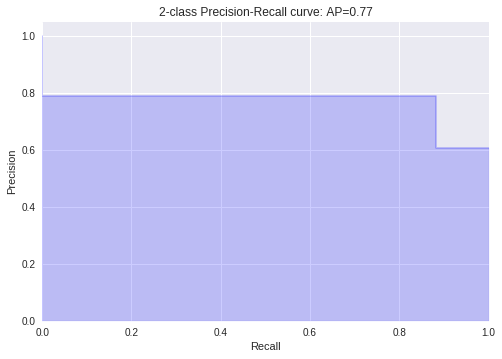

              precision    recall  f1-score   support

         Boy       0.79      0.88      0.83        17
        Girl       0.78      0.64      0.70        11

   micro avg       0.79      0.79      0.79        28
   macro avg       0.78      0.76      0.77        28
weighted avg       0.78      0.79      0.78        28



In [21]:
#結果圖像化
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test107, predicted_ans)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test107, predicted_ans)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()
#===================================================================
from sklearn import metrics
#print(metrics.precision_score(y_test, predicted_ans, average='micro'))
#print(metrics.recall_score(y_test, predicted_ans, average='micro'))

labels = [1,-1]
targets_name = ['Boy','Girl']
print(metrics.classification_report(y_test107, predicted_ans,labels=labels,target_names = targets_name))

# **undersampling**

Average precision-recall2 score: 0.81


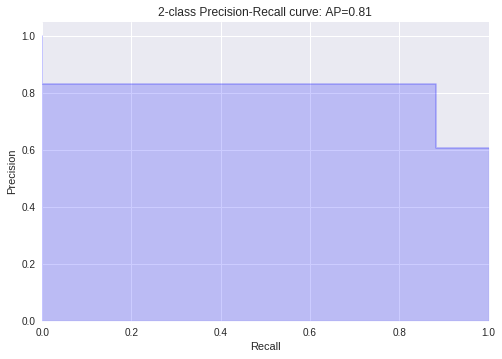

              precision    recall  f1-score   support

         Boy       0.83      0.88      0.86        17
        Girl       0.80      0.73      0.76        11

   micro avg       0.82      0.82      0.82        28
   macro avg       0.82      0.80      0.81        28
weighted avg       0.82      0.82      0.82        28



In [22]:
#結果圖像化
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test107, predicted_ans2)

print('Average precision-recall2 score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test107, predicted_ans2)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()
from sklearn import metrics
#print(metrics.precision_score(y_test, predicted_ans, average='micro'))
#print(metrics.recall_score(y_test, predicted_ans, average='micro'))

labels = [1,-1]
targets_name = ['Boy','Girl']
print(metrics.classification_report(y_test107, predicted_ans2,labels=labels,target_names = targets_name))

# oversampling

Average precision-recall score: 0.81


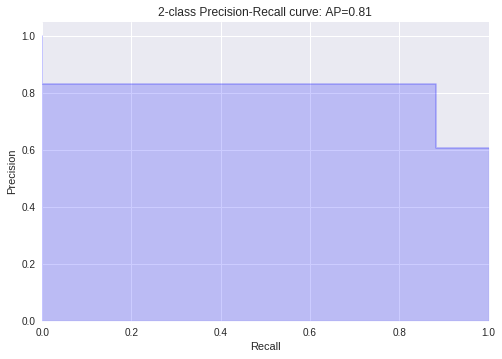

              precision    recall  f1-score   support

         Boy       0.83      0.88      0.86        17
        Girl       0.80      0.73      0.76        11

   micro avg       0.82      0.82      0.82        28
   macro avg       0.82      0.80      0.81        28
weighted avg       0.82      0.82      0.82        28



In [23]:
#結果圖像化
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test107, predicted_ans3)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test107, predicted_ans3)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()
#===================================================================
from sklearn import metrics
#print(metrics.precision_score(y_test, predicted_ans, average='micro'))
#print(metrics.recall_score(y_test, predicted_ans, average='micro'))

labels = [1,-1]
targets_name = ['Boy','Girl']
print(metrics.classification_report(y_test107, predicted_ans3,labels=labels,target_names = targets_name))

# Randomforest

In [0]:
from sklearn.preprocessing import StandardScaler
XR_test=X_test107
XR2_test=X_test107
XR3_test=X_test107


In [0]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# 載入資料




sc = StandardScaler()  
#X_train = sc.fit_transform(X_train)  
#XR_test = sc.transform(XR_test)  

from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=120, random_state=2)  
regressor.fit(X_train, y_train)  
r_predicted_ans = regressor.predict(XR_test)  


# oversampling


In [0]:
#sc3 = StandardScaler()  
#X3_train = sc3.fit_transform(X3_train)  
#XR3_test = sc3.transform(XR3_test)  



regressor3 = RandomForestClassifier(n_estimators=120, random_state=2)  
regressor3.fit(X3_train, y3_train)  
r3_predicted_ans = regressor3.predict(XR3_test)  

# **undersampling**

In [0]:

#sc2 = StandardScaler()  
#X2_train = sc2.fit_transform(X2_train)  
#XR2_test = sc2.transform(XR2_test) 

from sklearn.ensemble import RandomForestClassifier

regressor2 = RandomForestClassifier(n_estimators=120, random_state=2)  
regressor2.fit(X2_train, y2_train)  
r2_predicted_ans = regressor2.predict(XR2_test)  

# (rf)inital data

Average precision-recall score: 0.81


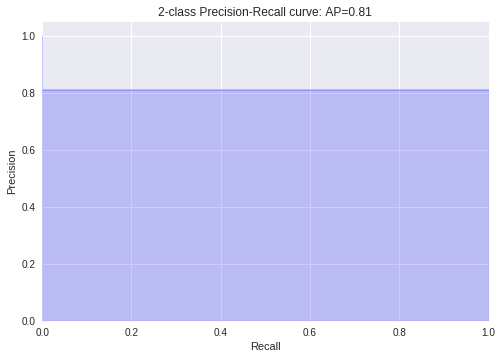

              precision    recall  f1-score   support

         Boy       0.81      1.00      0.89        17
        Girl       1.00      0.64      0.78        11

   micro avg       0.86      0.86      0.86        28
   macro avg       0.90      0.82      0.84        28
weighted avg       0.88      0.86      0.85        28



In [28]:
#結果圖像化#inital
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test107, r_predicted_ans)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test107, r_predicted_ans)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()
#===================================================================
from sklearn import metrics
#print(metrics.precision_score(y_test, predicted_ans, average='micro'))
#print(metrics.recall_score(y_test, predicted_ans, average='micro'))

labels = [1,-1]
targets_name = ['Boy','Girl']
print(metrics.classification_report(y_test107, r_predicted_ans,labels=labels,target_names = targets_name))

# **undersampling**

Average precision-recall score: 0.81


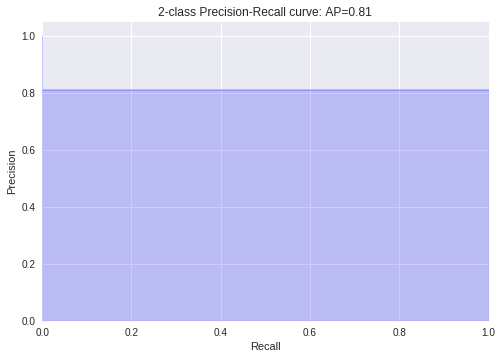

              precision    recall  f1-score   support

         Boy       0.83      0.88      0.86        17
        Girl       0.80      0.73      0.76        11

   micro avg       0.82      0.82      0.82        28
   macro avg       0.82      0.80      0.81        28
weighted avg       0.82      0.82      0.82        28



In [30]:
#結果圖像化#inital
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test107, r_predicted_ans)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test107, r_predicted_ans)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()
#===================================================================
from sklearn import metrics
#print(metrics.precision_score(y_test, predicted_ans, average='micro'))
#print(metrics.recall_score(y_test, predicted_ans, average='micro'))

labels = [1,-1]
targets_name = ['Boy','Girl']
print(metrics.classification_report(y_test107, r2_predicted_ans,labels=labels,target_names = targets_name))

# oversampling


Average precision-recall score: 0.81


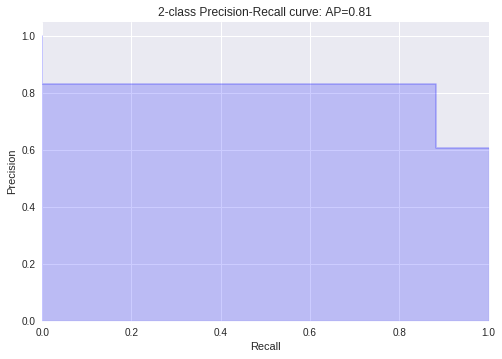

              precision    recall  f1-score   support

         Boy       0.83      0.88      0.86        17
        Girl       0.80      0.73      0.76        11

   micro avg       0.82      0.82      0.82        28
   macro avg       0.82      0.80      0.81        28
weighted avg       0.82      0.82      0.82        28



In [31]:
#結果圖像化
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test107, r3_predicted_ans)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test107, r3_predicted_ans)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()
#===================================================================
from sklearn import metrics

labels = [1,-1]
targets_name = ['Boy','Girl']
print(metrics.classification_report(y_test107, r3_predicted_ans,labels=labels,target_names = targets_name))